## Project: Titans or Shoestrings - Government Size 

## Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#indicators">Selected Indicators</a></li>
    <li><a href="#wrangling">Data Wrangling</a></li>
    <li><a href="#tax">Tax Base Range</a></li>
    <li><a href="#desire">Finding Desirable Countries</a></li>
    <li><a href="#sumanalysis">Desirability Analysis</a></li>
    <li><a href="#conclusion">Conclusions</a></li>
    <li><a href="#further">Further Analysis</a></li>
</ul>

<a id="intro"></a>
## Introduction 
Gapminder aggregates a number of datasets from various sources around the world, outlining basic statics about our lives. Government plays a large role in any person's life. How big a role should the government play? 

There's a constant battle about size of government in North American politics. A big government is often associated with a grey bureaucrat sitting behind a pane of safety glass laboriously applying stamps in triplicate while a line-up winds out on to the street. There are others who view an active and appropriately sized government as a necessity for any wealthy, democratic society, that the institution is as much a bastion of civilization as the tenets of its politics. Unfortunately, neither narrative gives an obvious answer to the question. 

Is there a better way to answer the question than more politics? Can some perspective give us some help here? 

Defining governmental success doesn't have any obvious solutions, but we can start with some investigation to assess where opportunities for further analysis may lie. A government does a lot of things and you can measure it a lot of ways, but if we were going out to Steve's Nation Emporium to shop for a government, what would be the basic items we'd look for? 

Let's start with one of the core premises that any state gives its people - You'll live long, happy, secure lives with us. And you'll pay taxes. 

<a id="indicators"></a>
## Selected Indicators

Initially, we will review these indicators: 
* Tax revenue, as a % of GDP 
* GDP per capita (US$, inflation adjusted)
* Poverty, as compared to nationally defined lines 
* Life expectancy
* Suicide rates 

These indicators represent the size of government, general economic efficacy of the people there, their livelihood, and how long they can expect to enjoy that livelihood. Suicide rates have been included as a measure of the psychological well-being and hope for the future that its populace exhibits.

#### Scope of Investigation

This investigation will be limited to simple statistics and graphics, for the purposes of exercise. 

#### Where's all this data coming from?
Gapminders (https://www.gapminder.org/data/). Data was taken from their newer database, and at the time of this project, extends up to 2017/2018 depending on the data set. 

Source-links are supplied below. Alternatively, the Gapminder tool at the URL above can be used to search for and download the datasets. 


* *Life Expectancy* <br></br>https://www.gapminder.org/data/documentation/gd004/

* *Tax Revenue as a Percentage of GDP*<br></br> http://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS

* *GDP per capita, US$, inflation adjusted* <br></br> 
http://data.worldbank.org/indicator/NY.GDP.PCAP.KD

* *Relative Poverty, (% below nationally defined poverty line)*, <br></br> 
http://go.worldbank.org/B53SONGPA0

* *Suicides per 100,000 people*<br></br>
http://spreadsheets.google.com/pub?key=troMumuI0Y6Phpwnj6qXa_A&gid=1

<a id="wrangling"></a>
## Data Wrangling

Let's import our data and get an idea of what we're looking at.

In [1]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce
from country_plot import country_plot #importing a custom plot for countries, as we'll be calling this regularly

%matplotlib inline

#grabbing data in to a set of dataframes
df_life = pd.read_csv('data/life_expectancy_years.csv') #life expectancy data set
df_gdp = pd.read_csv('data/gdppercapita_us_inflation_adjusted.csv') #GDP per capita, in US$, inflation adjusted
df_tax = pd.read_csv('data/tax_revenue_percent_of_gdp.csv') # Tax revenue as a % of GDP 
df_pov = pd.read_csv('data/alternative_poverty_percent_below_nationally_defined_poverty.csv') # % of people living below national poverty lines
df_su = pd.read_csv('data/suicide_per_100000_people.csv') # Suicide deaths per 100 000 people 

#giving them names
df_life.name = 'Life Expectancy'
df_gdp.name = 'GDP Per Capita'
df_tax.name = 'Tax Revenue, % of GDP'
df_pov.name = 'National Poverty Indicator, %'
df_su.name = 'Suicide Rates per Capita'

Let's start with an initial review of the data to see what we're dealing with. 

In [2]:
#checking roughly how the data looks, its overall size and layout
df_life.head(3), df_life.shape, df_life.dtypes.unique() 

(           geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...   \
 0  Afghanistan  28.2  28.2  28.2  28.2  28.2  28.2  28.1  28.1  28.1  ...    
 1      Albania  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  35.4  ...    
 2      Algeria  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  28.8  ...    
 
    2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
 0  55.7  56.2  56.7  57.2  57.7  57.8  57.9  58.0  58.4  58.7  
 1  75.9  76.3  76.7  77.0  77.2  77.4  77.6  77.7  77.9  78.0  
 2  76.3  76.5  76.7  76.8  77.0  77.1  77.3  77.4  77.6  77.9  
 
 [3 rows x 220 columns],
 (187, 220),
 array([dtype('O'), dtype('float64')], dtype=object))

Our dataset consists of 219 years of data, over 187 countries.  Are we missing any data? 

In [3]:
#checking how many missing values, in total, there are
df_life.isnull().sum().sum() 

516

Looks like we're missing about 516 datapoints.  Let's look at what we're missing.

In [4]:
df_life[df_life.isnull().any(axis=1)]

geo  1800  1801  1802  1803  1804  1805  1806  1807  1808  \
3             Andorra   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
48           Dominica   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
105  Marshall Islands   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

     ...   2009  2010  2011  2012  2013  2014  2015  2016  2017  2018  
3    ...   82.7  82.7  82.6  82.6  82.6  82.6  82.5  82.5   NaN   NaN  
48   ...   73.4  73.0  73.0  72.9  72.7  72.7  71.7  73.0   NaN   NaN  
105  ...   63.5  63.7  63.9  64.1  64.3  64.5  64.7  65.0   NaN   NaN  

[3 rows x 220 columns]

Looks like we're missing some years of data from three countries. It's unclear what should be done with this data yet. Let's look at the rest of the data to see if a solution presents itself.

In [5]:
df_gdp.head(3), df_gdp.shape, df_gdp.dtypes.unique(), df_gdp.isnull().sum().sum() #checking roughly how the data looks, its overall size and layout

(           geo    1960    1961    1962    1963    1964    1965    1966  \
 0  Afghanistan     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 1      Albania     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2      Algeria  2470.0  2080.0  1630.0  2130.0  2200.0  2280.0  2110.0   
 
      1967    1968   ...      2008    2009  2010    2011    2012    2013  \
 0     NaN     NaN   ...     445.0   525.0   553   569.0   630.0   634.0   
 1     NaN     NaN   ...    3780.0  3930.0  4090  4210.0  4280.0  4330.0   
 2  2240.0  2410.0   ...    4390.0  4390.0  4460  4500.0  4560.0  4600.0   
 
      2014    2015    2016    2017  
 0   630.0   620.0   618.0   618.0  
 1  4410.0  4520.0  4680.0  4870.0  
 2  4680.0  4760.0  4830.0  4830.0  
 
 [3 rows x 59 columns],
 (190, 59),
 array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object),
 2484)

More missing data, which we'll deal with later. There is also an issue of data-type incongruency. Let's look at these more carefully. 

In [6]:
df_gdp[df_gdp.isnull().any(axis=1)]

geo     1960     1961     1962     1963     1964  \
0               Afghanistan      NaN      NaN      NaN      NaN      NaN   
1                   Albania      NaN      NaN      NaN      NaN      NaN   
3                   Andorra      NaN      NaN      NaN      NaN      NaN   
4                    Angola      NaN      NaN      NaN      NaN      NaN   
5       Antigua and Barbuda      NaN      NaN      NaN      NaN      NaN   
7                   Armenia      NaN      NaN      NaN      NaN      NaN   
10               Azerbaijan      NaN      NaN      NaN      NaN      NaN   
12                  Bahrain      NaN      NaN      NaN      NaN      NaN   
14                 Barbados      NaN      NaN      NaN      NaN      NaN   
15                  Belarus      NaN      NaN      NaN      NaN      NaN   
19                   Bhutan      NaN      NaN      NaN      NaN      NaN   
21   Bosnia and Herzegovina      NaN      NaN      NaN      NaN      NaN   
24                   Brunei      NaN      NaN      NaN      NaN      NaN   
25                 Bulgaria      NaN      NaN      NaN      NaN      NaN   
28                 Cambodia      NaN      NaN      NaN      NaN      NaN   
31               Cape Verde      NaN      NaN      NaN      NaN      NaN   
37                  Comoros      NaN      NaN      NaN      NaN      NaN   
42                  Croatia      NaN      NaN      NaN      NaN      NaN   
43                     Cuba      NaN      NaN      NaN      NaN      NaN   
44                   Cyprus      NaN      NaN      NaN      NaN      NaN   
45           Czech Republic      NaN      NaN      NaN      NaN      NaN   
47                 Djibouti      NaN      NaN      NaN      NaN      NaN   
48                 Dominica      NaN      NaN      NaN      NaN      NaN   
52              El Salvador      NaN      NaN      NaN      NaN      NaN   
53        Equatorial Guinea      NaN      NaN      NaN      NaN      NaN   
54                  Eritrea      NaN      NaN      NaN      NaN      NaN   
55                  Estonia      NaN      NaN      NaN      NaN      NaN   
56                 Ethiopia      NaN      NaN      NaN      NaN      NaN   
61                   Gambia      NaN      NaN      NaN      NaN      NaN   
62                  Georgia      NaN      NaN      NaN      NaN      NaN   
..                      ...      ...      ...      ...      ...      ...   
140                  Russia      NaN      NaN      NaN      NaN      NaN   
142                   Samoa      NaN      NaN      NaN      NaN      NaN   
143              San Marino      NaN      NaN      NaN      NaN      NaN   
144   Sao Tome and Principe      NaN      NaN      NaN      NaN      NaN   
145            Saudi Arabia      NaN      NaN      NaN      NaN      NaN   
147                  Serbia      NaN      NaN      NaN      NaN      NaN   
151         Slovak Republic      NaN      NaN      NaN      NaN      NaN   
152                Slovenia      NaN      NaN      NaN      NaN      NaN   
153         Solomon Islands      NaN      NaN      NaN      NaN      NaN   
157               Sri Lanka      NaN    586.0    594.0    595.0    604.0   
158     St. Kitts and Nevis      NaN      NaN      NaN      NaN      NaN   
159               St. Lucia      NaN      NaN      NaN      NaN      NaN   
162                Suriname      NaN      NaN      NaN      NaN      NaN   
163               Swaziland      NaN      NaN      NaN      NaN      NaN   
165             Switzerland      NaN      NaN      NaN      NaN      NaN   
166              Tajikistan      NaN      NaN      NaN      NaN      NaN   
167                Tanzania      NaN      NaN      NaN      NaN      NaN   
169             Timor-Leste      NaN      NaN      NaN      NaN      NaN   
171                   Tonga      NaN      NaN      NaN      NaN      NaN   
173                 Tunisia      NaN      NaN      NaN      NaN      NaN   
175            Turkmenistan      NaN      NaN      NaN      NaN      NaN

In [7]:
df_gdp.select_dtypes(include ='int64').nunique() #checking where our weird data is

2010    180
dtype: int64

Our missing data appears be a historical problem, where data wasn't gathered for past dates in this dataset. 

For the datatype issue, all of the data from 2010 in our GDP dataframe is in integers. This will probably be fine for our purposes, but I'm going to transform it to floats for the sake of good practice. 

Given that the rest of the dataset is represented by floats, and that any measurement of GDP per Capita is definitely a real number, this modification isn't going to negatively impact the data quality.

In [8]:
df_gdp['2010'] =df_gdp['2010'].astype('float64'); #reassigning datatypes
df_gdp.dtypes.unique()

array([dtype('O'), dtype('float64')], dtype=object)

On to the next set. 

In [9]:
df_tax.head(3), df_tax.shape, df_tax.dtypes.unique(), df_tax.isnull().sum().sum() #checking roughly how the data looks, its overall size and layout

(           geo  1972  1973  1974  1975  1976  1977  1978  1979  1980  ...   \
 0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 
     2008   2009   2010   2011   2012   2013   2014   2015  2016  2017  
 0   6.04   8.44   9.12   8.85   7.47   7.08   6.84   7.55   NaN   NaN  
 1    NaN    NaN    NaN  18.00  17.50  16.50  18.30  18.50  17.6   NaN  
 2  45.30  35.10  34.40  37.20    NaN    NaN    NaN    NaN   NaN   NaN  
 
 [3 rows x 47 columns],
 (161, 47),
 array([dtype('O'), dtype('float64')], dtype=object),
 3523)

More obvious missing data, but our datatypes look OK. 

In [10]:
df_pov.head(3), df_pov.shape, df_pov.dtypes.unique(), df_pov.isnull().sum().sum()#checking roughly how the data looks, its overall size and layout

(           geo  1985  1986  1987  1988  1989  1990  1991  1992  1993  ...   \
 0  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 1      Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 2      Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
 
    2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  
 0   NaN   NaN   NaN  35.8   NaN   NaN   NaN   NaN   NaN   NaN  
 1  12.4   NaN   NaN   NaN  14.3   NaN   NaN   NaN   NaN   NaN  
 2   NaN   NaN   NaN   5.5   NaN   NaN   NaN   NaN   NaN   NaN  
 
 [3 rows x 34 columns],
 (135, 34),
 array([dtype('O'), dtype('float64')], dtype=object),
 3682)

In [11]:
df_su.head(3), df_su.shape, df_su.dtypes.unique(), df_su.isnull().sum().sum()#checking roughly how the data looks, its overall size and layout

(                   geo  1950  1951  1952  1953  1954  1955  1956  1957  1958  \
 0              Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
 1  Antigua and Barbuda   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
 2            Argentina   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
 
    ...   2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
 0  ...   4.06  5.34   NaN  3.08   NaN   NaN   NaN   NaN   NaN   NaN  
 1  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 2  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
 
 [3 rows x 68 columns],
 (104, 68),
 array([dtype('O'), dtype('float64')], dtype=object),
 3976)

Currently, our dataframe has a numerical index with another column for which country it is. For future use, the index should be the country name. This will make it easier to figure out what we're looking at.

In [12]:
list_df = [df_life, df_gdp, df_tax, df_pov, df_su]

In [13]:
for i in list_df:      #setting index to be geo column
    i.set_index('geo',inplace=True) 

Now, for our missing data. Given that we're seeing a lot of missing data in all of our datasetes, there are probably countries that will be meaningless to analyze. 

Let's look at how much missing data we have in our datasets and see what we can salvage from them.

In [14]:
#checking how much data is missing in our sets


#loop through the dataframes, determine the percentage of data that we're missing
for frame in list_df:
    a = frame.isnull().sum().sum()
    b = frame.count().sum()
    
    miss = '{:.1%}'.format(a / (a+b))
    print(frame.name, '  ', miss)

Life Expectancy    1.3%
GDP Per Capita    22.5%
Tax Revenue, % of GDP    47.6%
National Poverty Indicator, %    82.6%
Suicide Rates per Capita    57.1%


Given that we're missing large swaths of data, we should probably do something with them. With the goal of trying to assess how big a government should be, and that our primary indicator of that is Tax Revenue, we should use that as the baseline for our analysis. 

If we don't have any tax data, then there's not much point in reviewing the rest of the data we have. 

In [15]:
df_tax.columns #checking what the earliest column is

Index(['1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017'],
      dtype='object')

As our tax data only goes back to 1972, let's trim the rest of our datasets to start there for ease of graphing. I will be messing with the means for each country for those data sets, but I'm only really interested in the current comparison. So lets drop them.

In [16]:
y = '1972' #search date

#drop columns not included in the tax data (if possible)
for frame in list_df:
    if y in frame.columns.tolist():
        a = frame.columns.tolist()
        del a[a.index(y):len(a)]
        frame.drop(a,axis=1,inplace = True)

I'm also not interested in looking at countries with largely spotty data. For this purpose, I'm going to pass over any countries missing 75% of their data. This is only going to affect a few our datasets - the poverty dataset will basically be wiped out if I cut it back with that threshold. I'd still like to include it for graphing purposes, where it exists, but will be dropping it from analysis otherwise.

In [17]:
#modified list of dataframes
mod_list_df = [df_life, df_gdp, df_tax,df_su]

#drop countries missing more than 75% of its data in those dataframes
for frame in mod_list_df:
    print(frame.shape)
    a = int(len(frame.columns)*0.75)
    print(a)
    frame.dropna(axis='index',thresh=a,inplace=True)
    print(frame.shape)

(187, 47)
35
(187, 47)
(190, 46)
34
(140, 46)
(161, 46)
34
(47, 46)
(104, 45)
33
(34, 45)


Now that we've collated our data in to something meaningful, we need to deal with the differences in scales. The magnitude of each value is less important than its relative increase compared to its average value. This goes for life expectancy and GDP/Capita values. 

Let's normalize all of our data. Our poverty dataframe is already a percentage, and doesn't need the same adjustment. I'll be saving the actual values for maximums, minimums and means for ease of comparison later.

In [18]:
#generating normalzied datasets so they'll graph together nicely
#need to figure out how to loop this - dynamically naming variables? Some method I'm missing? For loops don't work as expected

#use max and min for each year and use to normalize data in each year 
df_gdp_n = (df_gdp - df_gdp.min())/ (df_gdp.max() - df_gdp.min()) 
df_life_n = (df_life - df_life.min()) / (df_life.max() - df_life.min())
df_tax_n = (df_tax - df_tax.min()) / (df_tax.max() - df_tax.min())
df_su_n = (df_su - df_su.min()) / (df_su.max() - df_su.min())
df_pov_n = df_pov.apply(lambda x: x/100)


In [19]:
#add mean column to datasets
df_gdp_n['mean'] = df_gdp_n.mean(axis=1);
df_life_n['mean'] = df_life_n.mean(axis=1);
df_tax_n['mean'] = df_tax_n.mean(axis=1);
df_pov_n['mean'] = df_pov_n.mean(axis =1);
df_su_n['mean'] = df_su_n.mean(axis =1);

list_df= [df_gdp_n, df_life_n, df_tax_n, df_pov_n, df_su_n]

In [20]:
#export data back to csvs for use by plotting function
df_gdp_n.to_csv('data/gdp_norm.csv', index_label=False)
df_life_n.to_csv('data/life_norm.csv', index_label=False)
df_tax_n.to_csv('data/tax_norm.csv', index_label=False)
df_pov_n.to_csv('data/poverty_norm.csv', index_label=False)
df_su_n.to_csv('data/suicide_norm.csv', index_label=False)


<a id="tax"></a>
## Tax Base Range

Tax base is the variable we want to get a better handle on. How big should this tax-base be? 

Let's plot this data to see how each country compares.

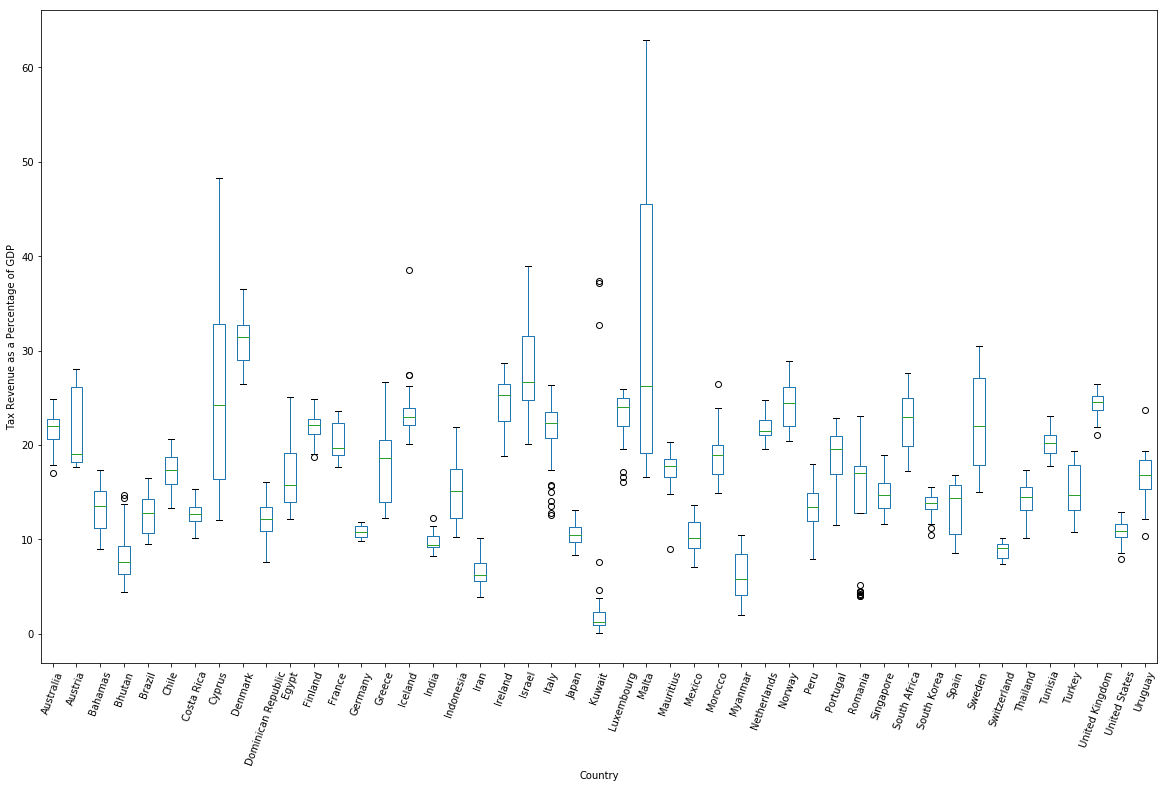

In [21]:
#boxplot tax data, by country, aggregated from 1972 to 2017
df_tax.transpose().plot(kind='box',figsize=(20,12))
plt.xticks(rotation=70)
plt.xlabel('Country')
plt.ylabel('Tax Revenue as a Percentage of GDP')
plt.plot;

The tax data, on its own, varies wildly across each nation. Tax revenue can range up to 60% of GDP, though the means for most of the data appears to fall between 10% and 30%. 

Let's look at the same data but only from the past ten years.

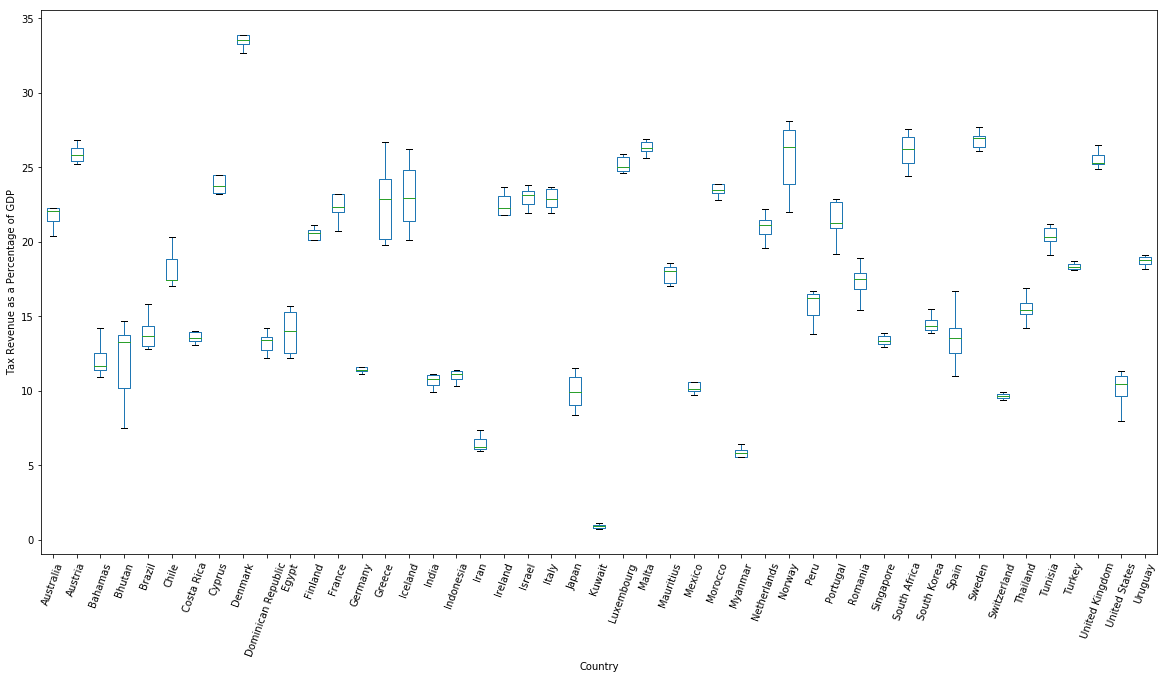

In [22]:
#plot tax data, by country, as box plot, from 2007 to 2017. Strip outliers
df_tax[df_tax.columns[35:45]].transpose().plot(kind='box',figsize=(20,10),showfliers=False)
plt.xticks(rotation=70)
plt.xlabel('Country')
plt.ylabel('Tax Revenue as a Percentage of GDP')
plt.plot;

As suspected, the spread of values for any given country over the last ten years is much tighter. However, this data on its own doesn't tell us anything useful enough to make a decision. We'll need to look at some additional factors to assess if there's any likely correlation between tax revenues and quality of life. 

<a id="desire"></a>
## Finding Desirable Countries

Given that I'm trying to find the countries with the best fit for relative government size, I should see if the countries at the top of each of my major criteria have any overlap. 

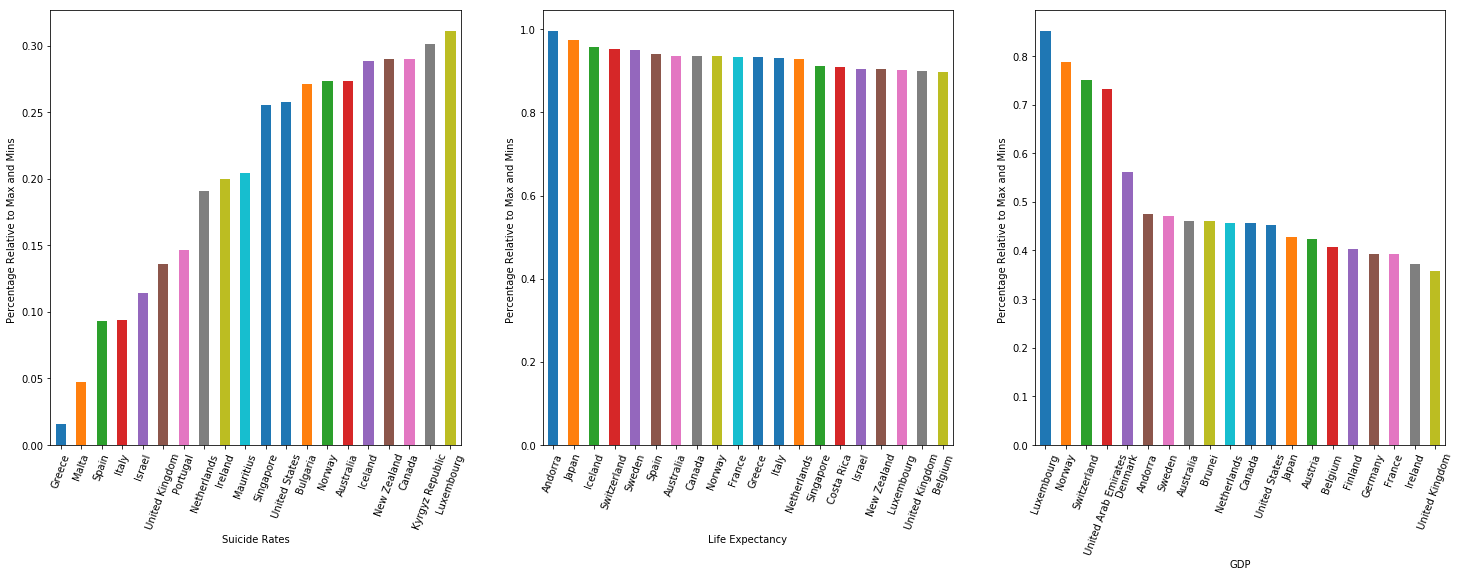

In [23]:
#need to plot GDP, Tax, and Life Expectancy next to one another to do some visual comparisons to find more interesting countries
number = 20; # number of countries to plot

fig = plt.figure(figsize=(25,8))
ax1 = fig.add_subplot(131,)
ax2= fig.add_subplot(132,)
ax3 = fig.add_subplot(133,)


#sort by largest gdp/cap
df_gdp_n.sort_values('mean', ascending = False)['mean'].iloc[:number].plot(kind='bar');
plt.xticks(rotation=70)
plt.xlabel('GDP')
plt.ylabel('Percentage Relative to Max and Mins ')
plt.subplot(ax2);

#sort by largest life expectancy
df_life_n.sort_values('mean', ascending = False)['mean'].iloc[:number].plot(kind='bar');
plt.xticks(rotation=70)
plt.xlabel('Life Expectancy')
plt.ylabel('Percentage Relative to Max and Mins ')
plt.subplot(ax1);

#sort by smallest suicide rates
df_su_n.sort_values('mean', ascending = True)['mean'].iloc[:number].plot(kind='bar'); 
plt.xticks(rotation=70)
plt.xlabel('Suicide Rates')
plt.ylabel('Percentage Relative to Max and Mins ')
plt.subplot(ax3);

In [24]:
#making a list of candidate countries that meet my top-20 criteria
a = pd.Series()  

a = a.append(df_gdp_n.sort_values('mean', ascending = False)['mean'].iloc[:20])
a = a.append(df_life_n.sort_values('mean', ascending = False)['mean'].iloc[:20])
a = a.append(df_su_n.sort_values('mean', ascending = True)['mean'].iloc[:20])
a = a.reset_index()
a.head()

index         0
0            Luxembourg  0.851780
1                Norway  0.788117
2           Switzerland  0.749538
3  United Arab Emirates  0.732773
4               Denmark  0.562127

We've generated a list of times that a country will show up in our criteria. I'd like to see how many countries we have that meet our criteria multiple times, and use those as a basis for assessing a likely tax range.

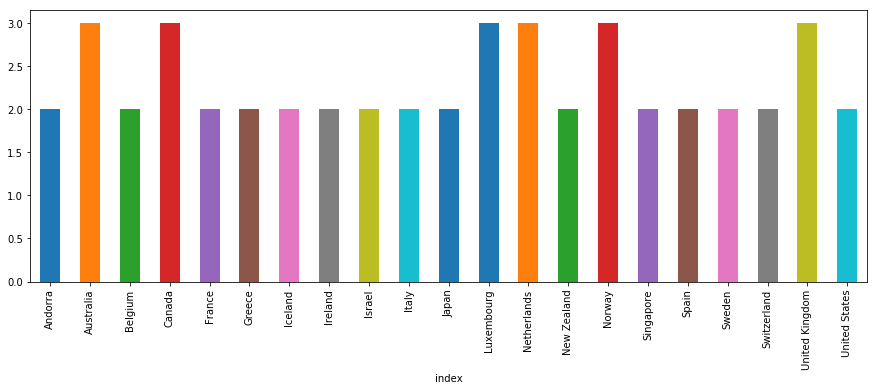

In [25]:
#plot a summary histogram to figure out some good targets to look at
b = a.groupby('index')[0].nunique()
c = b[b > 1]
c.plot(kind='bar', figsize = (15,5));

We've got some clear winners - Australia, Canada, Luxembourg, Netherlands, Norway, and the UK. For the purposes of preliminary analysis, let's chose the UK, Australia, the Netherlands and Norway to perform some initial assessment. I'm also going to compare these countries to the United States as a benchmark. This is due to the United States' apparent dominance in global politics, and international familiarity. 

In [26]:
#leaving out Canada as it's missing tax data
rank_countries = ['Australia', 'Luxembourg',  'Netherlands', 'Norway','United Kingdom'] 

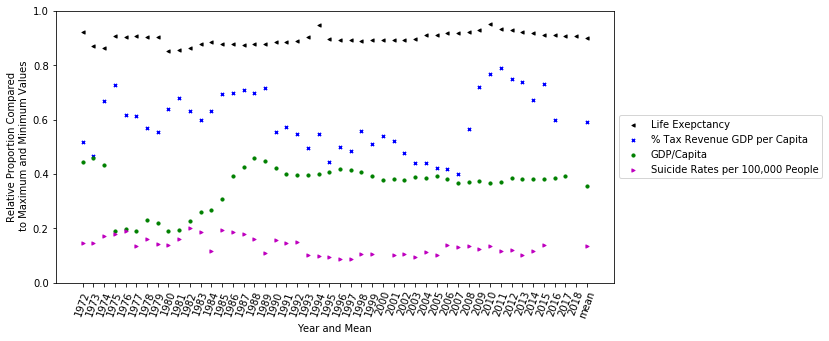

In [27]:
country_plot('United Kingdom');

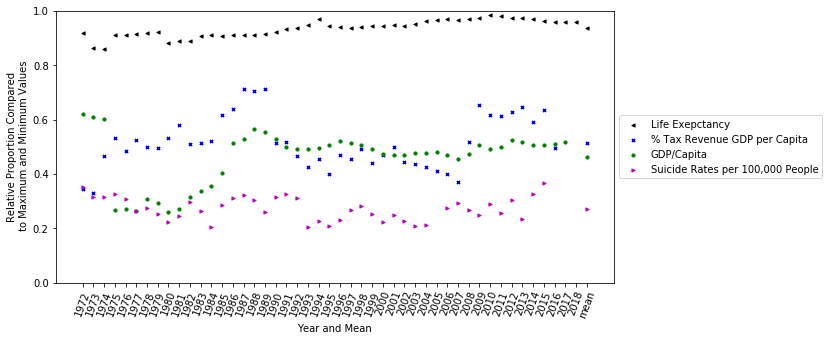

In [28]:
country_plot('Australia');

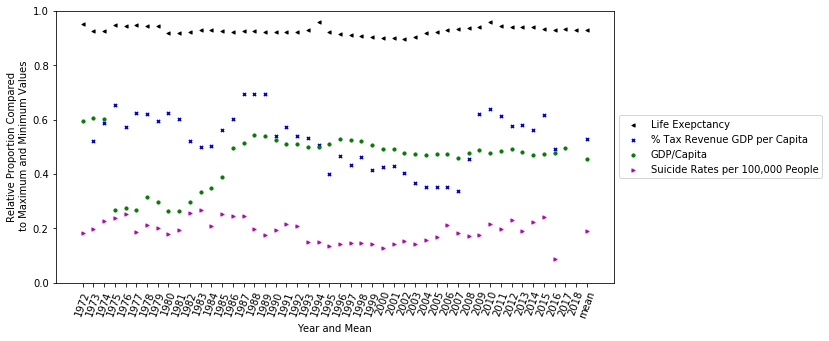

In [29]:
country_plot('Netherlands');

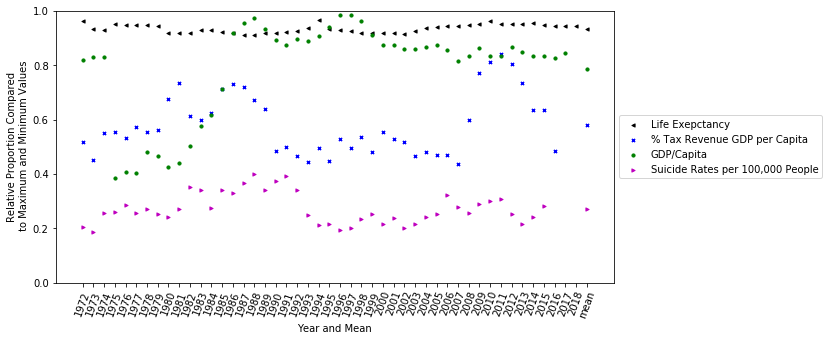

In [30]:
country_plot('Norway');

From the small sample size that we've reveiwed here, there are some trends worth noting. 

All of the selected countries follow very similar trends over the past 46 years.
  * Their life expectancy stays relatively even and high
  * GDP per capita trends relatively evenly. The big dips and recoveries tend occur around global economic events.
  * Proportionaly, suicide rates are relatively stable 
  
Answering a question about how big a government should be from these plots is difficult. All of the selected countries show wide swings in the relative size of their tax revenues per capita, while maintaining top positions in our selected indicators.  Reviewing just the top of the pile doesn't give us any obvious indicators. 
     

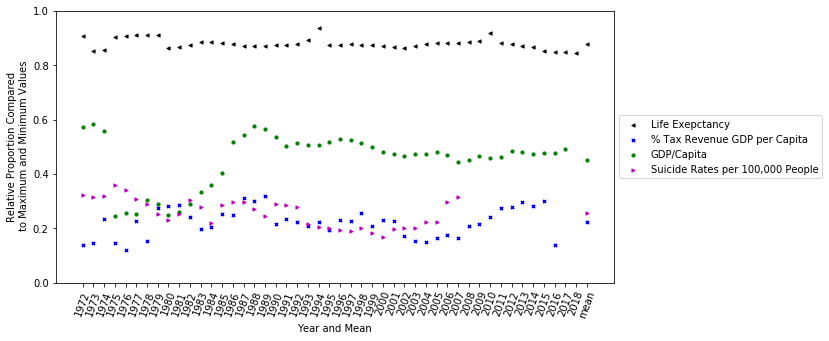

In [31]:
country_plot('United States');

The United States is one of the countries that did not make the top twenty countries for Life Expectancy. Their tax revenue per capita is also significnatly lower than the other riders of the top countries. 

Differences are a good way to trends. Let's look at some example countries that are in the bracket just below our top twenty countries, and review some samples from there.

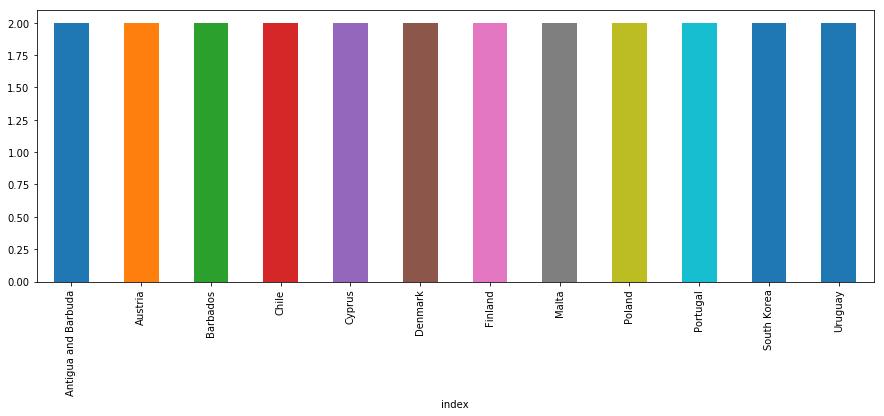

In [32]:
a = pd.Series()  

a = a.append(df_gdp_n.sort_values('mean', ascending = False)['mean'].iloc[20:50])
a = a.append(df_life_n.sort_values('mean', ascending = False)['mean'].iloc[20:50])
a = a.append(df_su_n.sort_values('mean', ascending = True)['mean'].iloc[20:50])
a = a.reset_index()

#plot a summary histogram to figure out some good targets to look at
b = a.groupby('index')[0].nunique()
c = b[b > 1]
c.plot(kind='bar', figsize = (15,5));

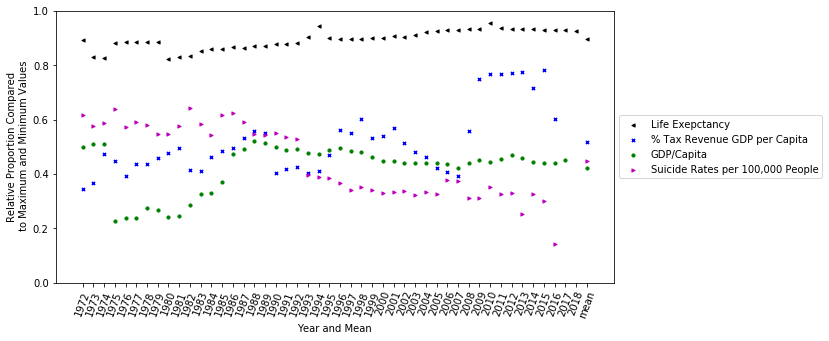

In [33]:
country_plot('Austria')

Austria marks a significantly higher suicide rate than the countries on the top end of the selected indicators. Life expectancies are somewhat lower. Government tax revenues are on the higher end of the selected countries, though the average over the last 46 years is similar to the others. 

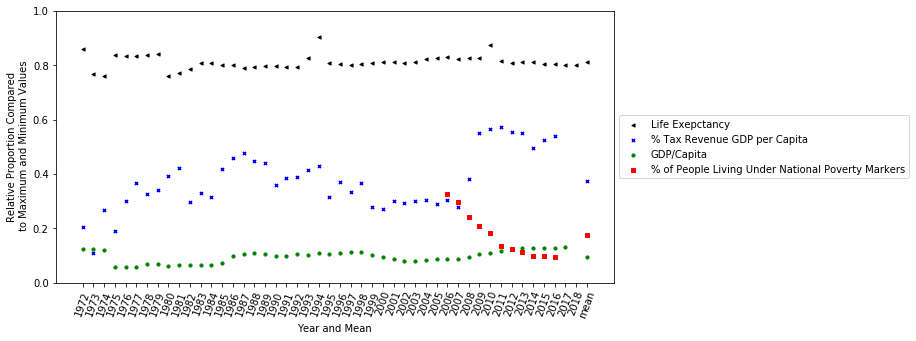

In [34]:
country_plot('Uruguay')

Uruguay is missing information on suicide rates, but while it's per capita tax revenue is within the bounds of the rest of our higher-performing countries, the GDP per capita and life expectancy are noticeably lower.

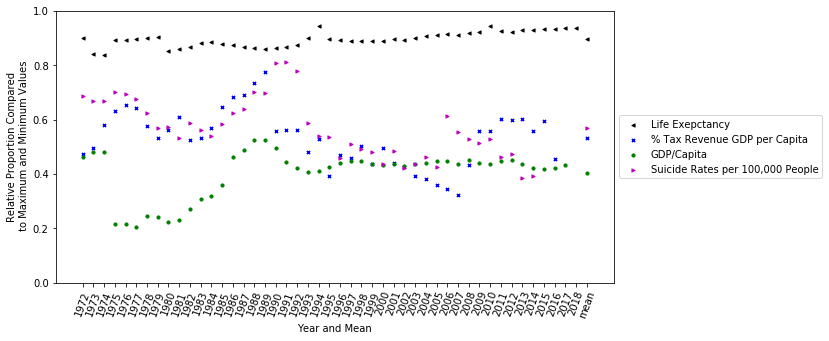

In [35]:
country_plot('Finland')

Finland exhibits a drasitcally higher suicide rate, while maintaining a similar life expectancy, GDP, and comparative governmental size. 

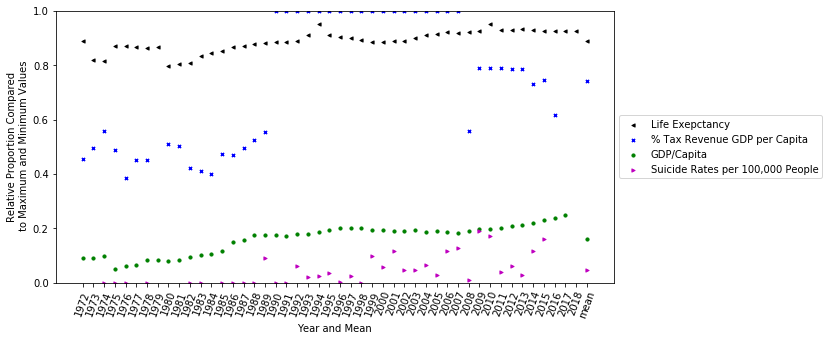

In [36]:
country_plot('Malta')

Malta exhibits a very high tax base, low GDP,  and also a low suicide rate per capita. 

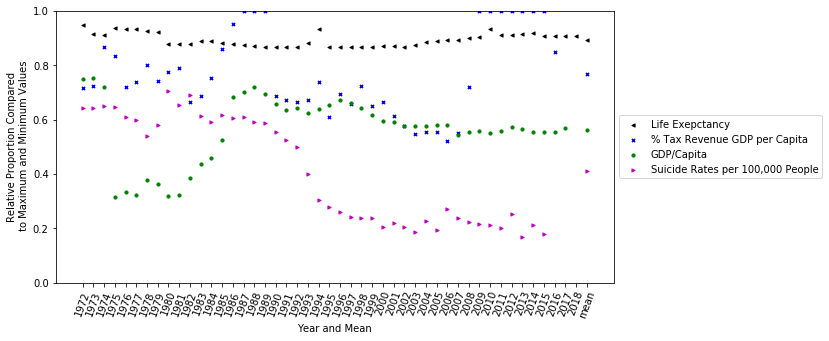

In [37]:
country_plot('Denmark')

Denmark's suicide rate, government size, and GDP per capita are also noticeably high. 

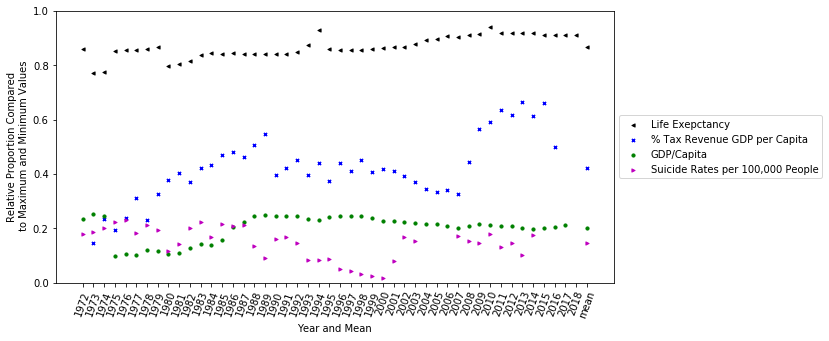

In [38]:
country_plot('Portugal')

<a id="sumanalysis"></a>
## Analysis Summary

Portugal's performance on the four indicators, other than suicide rates, is generally lower than the rest of the top performers. 

There are more similarities in our lower-bracket countries than there are similarities. While the highly-ranked countries all exhibit similar trends between them, each of these countries is markedly different. The way we've structured our analysis is a partial cause of this result - as we're only looking at historical data with no reference to trends within those countries, any negative past result will weigh heavily on an indicator. 

However, given the stability of the trends in the higher-ranked countries, it would suggest that they've at least got something figured out that may be repeatable. 

### Getting Some Numbers

We've seen some specific ranges of government size based on the normalized data we've been investigating. The data shows that a government should typically be operating between 0.4 and 0.8, for normalized data, to attain the kinds of markers that we want to hit. What's this in actual numbers? 


In [39]:
for country in rank_countries:
    stdev = df_tax.loc[country].std()
    mean = df_tax.loc[country].mean()
    print(country, '- Tax Revenue :', "{0:.1f}".format(mean),'%', '[',"{0:.1f}".format(mean-2*stdev),
          ',',"{0:.1f}".format(mean + 2*stdev),']')

Australia - Tax Revenue : 21.8 % [ 18.2 , 25.4 ]
Luxembourg - Tax Revenue : 23.2 % [ 18.4 , 28.1 ]
Netherlands - Tax Revenue : 21.9 % [ 19.5 , 24.3 ]
Norway - Tax Revenue : 24.2 % [ 19.2 , 29.2 ]
United Kingdom - Tax Revenue : 24.4 % [ 22.0 , 26.9 ]


<a id="conclusion"></a>
## Conclusion
This preliminary analysis suggests that a country should be collecting approximatley 18 to 29 % of its GDP on tax revenue to maintain a quality of life based on our selected indicators. The countries currently exhibiting higher values on our selected indicators fall in this subset of government spending. 

This analysis, however, is preliminary in nature. We don't currently have a good grasp on any correlational or causal relationships between  tax revenue and its affect on the selected indicators. There's certainly a logical argument to be made for a government's effect on its people's livelihoods, but we don't have data to support that currently. Further,  any sizable percentage of GDP is also a very large amount of money. The way that money is spent is likely a better indicator than how much of it overall there is. While overall tax revenues is a start, looking at the allocation of those tax revenues may be enlightening. 

Despite the limitations of this analysis, the similarities in the top-scoring countries suggest that there is some correlation and provide an avenue for further evaluation.


<a id="further"></a>
## Further Analysis

Some avenues for further analysis include:
* Assessing correlation coefficients between our selected indicators
* Investigation of government spending of high-ranking countries
* Making some assumptions about government size and testing them against the rest of the countries in our dataset
